### Initialise arrays etc

In [24]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (14,6)
import matplotlib.pyplot as plt
import numpy as np
from Vis import *

antennas = []
antennas.append(getTelescope("ATCA"))
antennas.append(getTelescope("Mopra"))
antennas.append(getTelescope("Parkes"))
antennas.append(getTelescope("Hobart"))
antennas.append(getTelescope("Ceduna"))
#antennas.append(getTelescope("Hartebeesthoek"))
#antennas.append(getTelescope("FAST"))


Dec = deg2rad(-60)
RA = deg2rad(0) # This actually should make no difference at all
step = 1  # Inverval for calculations, in minutes
freq = 1400; # MHz
bandwidth = 32 # MHz
calInt = 120 # Seconds

step /= (60*24)  # Convert to radians
step *= 2*pi
freq *= 1e6;
bandwidth *= 1e6

wavelength = 2.99792458e8/freq

### Create baselines

In [25]:
baselines = []
for i in range(len(antennas)):
    for j in range(i+1, len(antennas)):
        baselines.append(Baseline(antennas[i], antennas[j]))

### For each antenna calculate rise set 

In [26]:
for ant in antennas:
    ant.calcrise(RA,Dec)
    if ant.rise is not None:
        print(ant.name, ': ', rad2hour(ant.rise+ant.longitude), ' - ', rad2hour(ant.set+ant.longitude))
    else:
        print(ant.name, ': Does not rise')


ATCA :  15.888718818082424  -  8.111281181917576
Mopra :  15.733664382172034  -  8.266335617827966
Parkes :  18.278210115227328  -  5.7217898847726705
Hobart :  14.160185226731905  -  9.839814773268095
Ceduna :  15.239704429274228  -  8.760295570725777


### Baseline lengths

In [27]:
for b in baselines:
    print('{0} {1:.0f} km'.format(b.name, b.length/1000))

ATCA->Mopra 115 km
ATCA->Parkes 322 km
ATCA->Hobart 1396 km
ATCA->Ceduna 1508 km
Mopra->Parkes 207 km
Mopra->Hobart 1287 km
Mopra->Ceduna 1449 km
Parkes->Hobart 1089 km
Parkes->Ceduna 1361 km
Hobart->Ceduna 1703 km


### Calculate/Plot elevation for each telescope
Note this makes no attempt to cope with "wrap" issues for simplicity

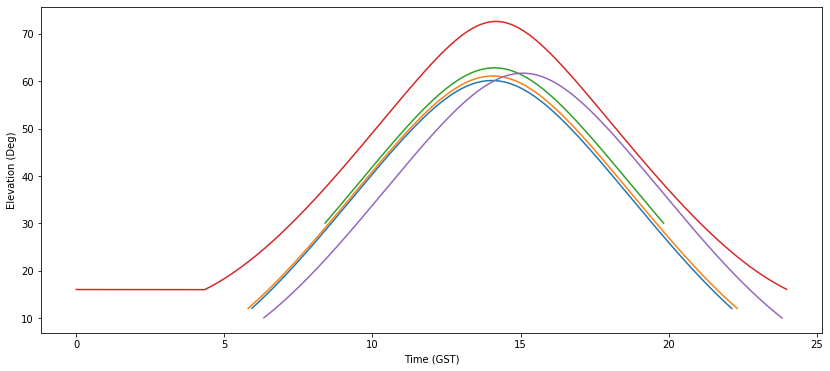

In [28]:
fig, axes = plt.subplots()

for ant in antennas:
    gsts = ant.upTimes(RA, Dec, step)
    if len(gsts)==0: continue
    times = [rad2hour(x) for x in gsts]
    
    (Az, El) = ant.calcAzEl(RA, Dec, gsts)
    degEl = [rad2deg(x) for x in El]
    axes.plot(times, degEl)

axes.set_xlabel('Time (GST)')
axes.set_ylabel('Elevation (Deg)');

### Calculate Baseline UV coordinates

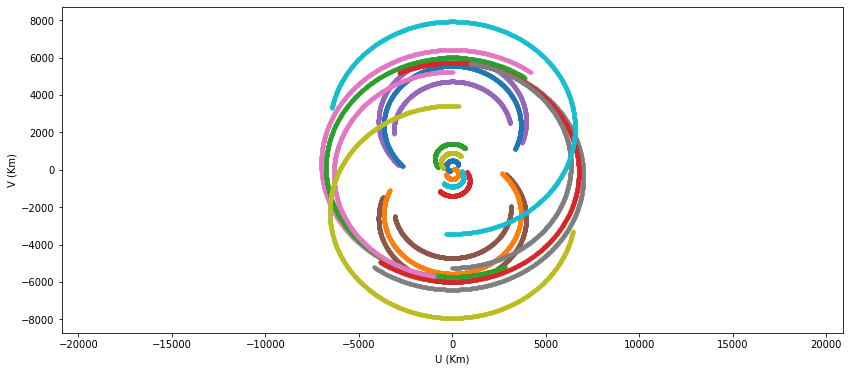

In [29]:
fig, axes = plt.subplots()

for b in baselines:
    b.calcUp(RA, Dec, step)
    if len(b.gst)==0: continue
    b.UVtrack(RA, Dec, b.gst, wavelength) 
    u = b.u
    v = b.v
    axes.plot(-u/1000, v/1000, '.', u/1000, -v/1000, '.')
    
axes.set_xlabel('U (Km)')
axes.set_ylabel('V (Km)');
axes.axis('equal');


### Baseline Sensitivity

In [30]:
for b in baselines:
    print('{0} {1:.2f} mJy'.format(b.name, b.sensitivity(bandwidth,calInt,True)*1e3))

ATCA->Mopra 1.66 mJy
ATCA->Parkes 0.68 mJy
ATCA->Hobart 2.32 mJy
ATCA->Ceduna 3.38 mJy
Mopra->Parkes 1.27 mJy
Mopra->Hobart 4.36 mJy
Mopra->Ceduna 6.35 mJy
Parkes->Hobart 1.78 mJy
Parkes->Ceduna 2.59 mJy
Hobart->Ceduna 8.89 mJy


In [22]:
Jy2Str(imageRMS(baselines,bandwidth,60*60))

'45.6 uJy'

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
Hobart :  4.712789045436287  -  0.39241859197247575
1181
24 24
1157 1157


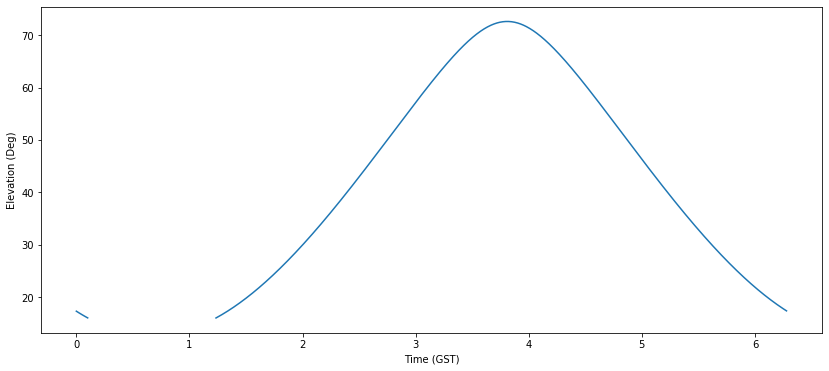

In [174]:
def splitTime(times, vals, step):
    # Split lists into multiple components, if there are any large steps in the "time" list. Assumes times is
    # ordered
    tdiff = np.where(np.diff(times)>step*2)
    if len(tdiff)==0:
        return([(times,vals)])
    else:
        retList = []
        i = 0
        for d in tdiff[0]:
            retList.append((times[i:d+1],vals[i:d+1]))
            i = d+1
        retList.append((times[i:],vals[i:]))
    return(retList)
        
ant = antennas[3]

RA=0.1

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
print(colors)
ant.calcrise(RA,Dec)
print(ant.name, ': ', rad2hour(ant.rise), ' - ', rad2hour(ant.set))

gsts = ant.upTimes(RA, Dec, step)
print(len(gsts))

if len(gsts) > 0:
    times = [rad2hour(x) for x in gsts]
    
    (Az, El) = ant.calcAzEl(RA, Dec, gsts)
    degEl = [rad2deg(x) for x in El]
    
    plots = splitTime(gsts,degEl,rad2hour(step))
    
    for p in plots:
        x = p[0]
        y = p[1]
        print(len(x),len(y))
    
        plt.plot(x, y,color=colors[0])

    plt.xlabel('Time (GST)')
    plt.ylabel('Elevation (Deg)');

In [121]:
x = np.diff(gsts)
y = np.where(x>step*2)
y[0][0]

229

In [165]:
a = gsts[:230]
a[220:]

[0.9599310885968813,
 0.964294411726867,
 0.9686577348568529,
 0.9730210579868387,
 0.9773843811168246,
 0.9817477042468103,
 0.9861110273767962,
 0.990474350506782,
 0.9948376736367679,
 0.9992009967667537]

In [94]:
c = []

In [97]:
c.append((a,b))

In [124]:
aa = np.arange(10)*10

In [130]:
bb = list(np.where(aa<50))

In [131]:
type(bb)

list

In [138]:
bb[0][1]

1